# Import Libraries

In [1]:
!pip install torchsummary

In [2]:
# Read All Data Batches
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Create PyTorch Dataset Class With Augmentation & Design Network
import torch

# Create PyTorch Dataset Class With Augmentation
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset

# Design Network
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from tqdm import tqdm
from torchsummary import summary

# Download and Extract Data

In [3]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz


--2025-11-04 02:08:08--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  13.1MB/s    in 14s     

2025-11-04 02:08:23 (11.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [4]:
!tar -xvzf /content/cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


# Read All Data Batches

In [5]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## Understanding Data Structure

In [6]:
batch = unpickle('/content/cifar-10-batches-py/data_batch_1')

In [7]:
batch.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [8]:
labels = batch.get(b'labels')
data = batch.get(b'data')
filenames = batch.get(b'filenames')
print(labels)
print()
print(data)
print()
print(filenames)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

## Display an Item

In [9]:
display(len(labels))
display(len(data))
display(len(filenames))

10000

10000

10000

In [10]:
def display_item(item):
  image_data = item.reshape((3, 32, 32)).transpose(1, 2, 0)
  plt.imshow(image_data)
  plt.axis('off')
  plt.show()

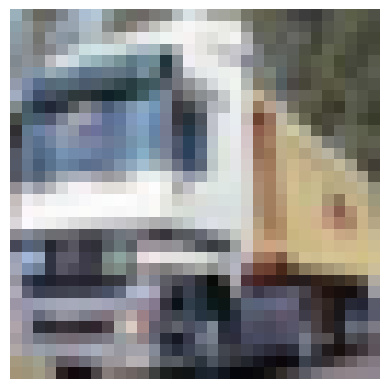

9

b'camion_s_000148.png'

In [11]:
display_item(data[1])
display(labels[1])
display(filenames[1])


## Read and Concatenate Data

In [12]:
batch_1 = unpickle('/content/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('/content/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('/content/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('/content/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('/content/cifar-10-batches-py/data_batch_5')
test_batch = unpickle('/content/cifar-10-batches-py/test_batch')

In [13]:
train_data = np.concatenate((batch_1.get(b'data'), batch_2.get(b'data'), batch_3.get(b'data'), batch_4.get(b'data'), batch_5.get(b'data')), axis=0)
train_labels = np.concatenate((batch_1.get(b'labels'), batch_2.get(b'labels'), batch_3.get(b'labels'), batch_4.get(b'labels'), batch_5.get(b'labels')), axis=0)
train_filenames = np.concatenate((batch_1.get(b'filenames'), batch_2.get(b'filenames'), batch_3.get(b'filenames'), batch_4.get(b'filenames'), batch_5.get(b'filenames')), axis=0)
test_data = np.array(test_batch.get(b'data'))
test_labels = np.array(test_batch.get(b'labels'))
test_filenames = np.array(test_batch.get(b'filenames'))

### Verify Data Integrity After Reading

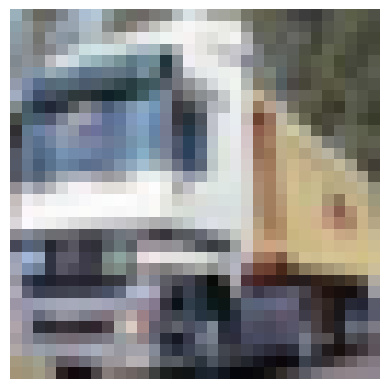

np.int64(9)

np.bytes_(b'camion_s_000148.png')

In [14]:
display_item(train_data[1])
display(train_labels[1])
display(train_filenames[1])

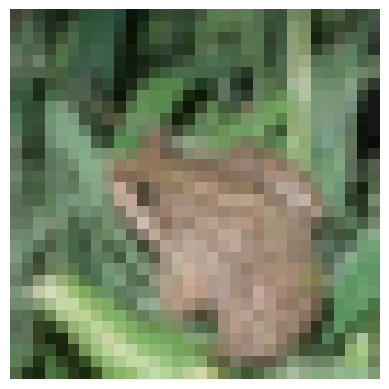

np.int64(6)

np.bytes_(b'green_frog_s_001658.png')

In [15]:
display_item(test_data[4])
display(test_labels[4])
display(test_filenames[4])

# Preprocess

## Augmentation Pipeline Definition

In [16]:
def get_augmentation_pipeline(image_size=(32, 32)):

    transform = A.Compose([
        A.HorizontalFlip(p=0.25),
        A.VerticalFlip(p=0.25),
        A.RandomRotate90(p=0.25),
        A.GaussianBlur(blur_limit=(3, 7), p=0.25),

        A.RandomBrightnessContrast(
            brightness_limit=0.2,  # roughly corresponds to Multiply(0.8, 1.2)
            contrast_limit=0.5,    # corresponds to LinearContrast(0.75, 1.5)
            p=0.25
        ),

        A.GaussNoise(p=0.25),

        A.Affine(
            scale=(0.8, 1.2),
            rotate=(-25, 25),
            shear=(-8, 8),
            p=0.25
        ),

        A.RandomResizedCrop(
            size=image_size,
            scale=(0.9, 1.0),
            ratio=(0.9, 1.1),
            p=0.25
        ),
        A.Normalize(
            mean=(0.4914, 0.4822, 0.4465),
            std=(0.2023, 0.1994, 0.2010),
        ),

        ToTensorV2()], p=1.0)

    return transform

## Convert and Reshape Method Definition

In [17]:
def cifar_array_to_image(array):
    return array.reshape(3, 32, 32).transpose(1, 2, 0).astype(np.uint8)

# Create PyTorch Dataset Class With Augmentation

In [18]:
class CIFARDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = cifar_array_to_image(self.data[idx])
        label = self.labels[idx]

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented["image"]

        return image, label

In [19]:
train_transform = get_augmentation_pipeline(image_size=(32, 32))
test_transform = A.Compose([A.Resize(32, 32),
    A.Normalize(
    mean=(0.4914, 0.4822, 0.4465),
    std=(0.2023, 0.1994, 0.2010),), ToTensorV2()])

train_dataset = CIFARDataset(train_data, train_labels, transform=train_transform)
test_dataset  = CIFARDataset(test_data, test_labels, transform=test_transform)

# Network

## DataLoader Design

In [20]:
batch_size = 16
num_workers = 2

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


## CNN

### Model Design

In [21]:
class CNNNetwork(nn.Module):
    def __init__(self):
        super(CNNNetwork, self).__init__()

        def conv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 3, padding=1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            )

        self.features = nn.Sequential(
            conv_block(3, 64),
            conv_block(64, 64),
            nn.MaxPool2d(2, 2),  # 16x16

            conv_block(64, 128),
            conv_block(128, 128),
            nn.MaxPool2d(2, 2),  # 8x8

            conv_block(128, 256),
            conv_block(256, 256),
            nn.MaxPool2d(2, 2),  # 4x4

            conv_block(256, 512),
            nn.Dropout(0.3),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 4 * 4, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [22]:
model = CNNNetwork()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

summary(model, input_size=(3, 32, 32), device=device.type)

device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,728
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14      

In [23]:
model = CNNNetwork()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

device: cuda


### Training and Evaluation

In [24]:
num_epochs = 20
train_losses, test_losses, train_accs, test_accs = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device, dtype=torch.float32), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_train_loss = train_loss / total
    train_acc = 100 * correct / total
    scheduler.step()

    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)

    model.eval()
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device, dtype=torch.float32), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / total
    test_acc = 100 * correct / total

    test_losses.append(avg_test_loss)
    test_accs.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Test Loss: {avg_test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch [1/20] | Train Loss: 2.0503 | Train Acc: 22.76% | Test Loss: 1.8038 | Test Acc: 32.90%
Epoch [2/20] | Train Loss: 1.8738 | Train Acc: 30.34% | Test Loss: 1.6032 | Test Acc: 41.13%
Epoch [3/20] | Train Loss: 1.7193 | Train Acc: 36.93% | Test Loss: 1.3004 | Test Acc: 51.50%
Epoch [4/20] | Train Loss: 1.5750 | Train Acc: 42.72% | Test Loss: 1.1002 | Test Acc: 60.46%
Epoch [5/20] | Train Loss: 1.4820 | Train Acc: 46.59% | Test Loss: 1.1121 | Test Acc: 60.34%
Epoch [6/20] | Train Loss: 1.4246 | Train Acc: 48.92% | Test Loss: 1.0392 | Test Acc: 63.20%
Epoch [7/20] | Train Loss: 1.3711 | Train Acc: 51.08% | Test Loss: 0.9289 | Test Acc: 67.42%
Epoch [8/20] | Train Loss: 1.2343 | Train Acc: 56.21% | Test Loss: 0.8066 | Test Acc: 71.85%
Epoch [9/20] | Train Loss: 1.1876 | Train Acc: 57.86% | Test Loss: 0.7761 | Test Acc: 72.89%
Epoch [10/20] | Train Loss: 1.1673 | Train Acc: 58.83% | Test Loss: 0.7563 | Test Acc: 73.47%
Epoch [11/20] | Train Loss: 1.1411 | Train Acc: 59.79% | Test Loss: 0

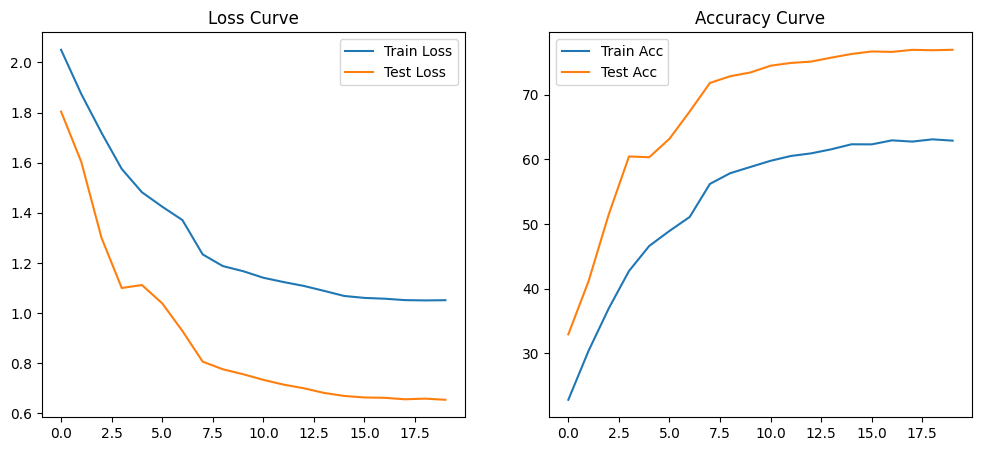

In [25]:
# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend(); plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(test_accs, label="Test Acc")
plt.legend(); plt.title("Accuracy Curve")
plt.show()

## ResNet

### Model Design

In [26]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample=False):
        super(ResidualBlock, self).__init__()
        stride = 2 if downsample else 1

        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.skip = nn.Sequential()
        if downsample or in_channels != out_channels:
            # Adjust dimensions for the skip connection
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.skip(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)


# --- ResNet-based CNN ---
class ResNetCNNNetwork(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNetCNNNetwork, self).__init__()

        # Initial convolution
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )

        # Residual stages
        self.layer1 = nn.Sequential(
            ResidualBlock(64, 64),
            ResidualBlock(64, 64)
        )  # -> 32x32

        self.layer2 = nn.Sequential(
            ResidualBlock(64, 128, downsample=True),
            ResidualBlock(128, 128)
        )  # -> 16x16

        self.layer3 = nn.Sequential(
            ResidualBlock(128, 256, downsample=True),
            ResidualBlock(256, 256)
        )  # -> 8x8

        self.layer4 = nn.Sequential(
            ResidualBlock(256, 512, downsample=True),
            ResidualBlock(512, 512)
        )  # -> 4x4

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [27]:
model = ResNetCNNNetwork()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

summary(model, input_size=(3, 32, 32), device=device.type)

device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
     ResidualBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
    ResidualBlock-13           [-1, 64, 32, 32]               0
           Conv2d-14      

In [28]:
model = ResNetCNNNetwork()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

device: cuda


### Training and Evaluation

In [29]:
num_epochs = 20
train_losses, test_losses, train_accs, test_accs = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device, dtype=torch.float32), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_train_loss = train_loss / total
    train_acc = 100 * correct / total
    scheduler.step()

    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)

    model.eval()
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device, dtype=torch.float32), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / total
    test_acc = 100 * correct / total

    test_losses.append(avg_test_loss)
    test_accs.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Test Loss: {avg_test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch [1/20] | Train Loss: 1.9402 | Train Acc: 28.73% | Test Loss: 1.5741 | Test Acc: 41.94%
Epoch [2/20] | Train Loss: 1.7505 | Train Acc: 36.31% | Test Loss: 1.3749 | Test Acc: 50.17%
Epoch [3/20] | Train Loss: 1.6024 | Train Acc: 42.33% | Test Loss: 1.2616 | Test Acc: 55.10%
Epoch [4/20] | Train Loss: 1.4770 | Train Acc: 47.04% | Test Loss: 1.0814 | Test Acc: 61.19%
Epoch [5/20] | Train Loss: 1.3896 | Train Acc: 50.38% | Test Loss: 0.9524 | Test Acc: 66.46%
Epoch [6/20] | Train Loss: 1.3214 | Train Acc: 53.12% | Test Loss: 0.9109 | Test Acc: 67.31%
Epoch [7/20] | Train Loss: 1.2722 | Train Acc: 54.75% | Test Loss: 0.8430 | Test Acc: 70.93%
Epoch [8/20] | Train Loss: 1.1248 | Train Acc: 60.33% | Test Loss: 0.7377 | Test Acc: 74.50%
Epoch [9/20] | Train Loss: 1.0812 | Train Acc: 61.73% | Test Loss: 0.6925 | Test Acc: 76.16%
Epoch [10/20] | Train Loss: 1.0564 | Train Acc: 62.82% | Test Loss: 0.6750 | Test Acc: 76.70%
Epoch [11/20] | Train Loss: 1.0408 | Train Acc: 62.85% | Test Loss: 0

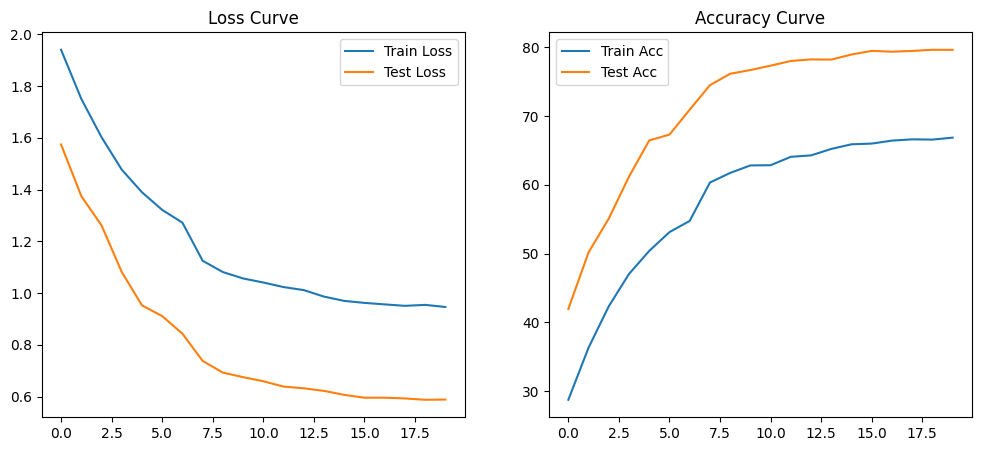

In [30]:
# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend(); plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(test_accs, label="Test Acc")
plt.legend(); plt.title("Accuracy Curve")
plt.show()